In [639]:
from matplotlib import pyplot as plt
import pandas as pd

In [640]:
#Obtain original data

df = pd.read_csv('dfPrint_semana4.csv')
data = df
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(5)

,date,league,local_team,visit_team,home_win,visitor_win,tie,exp_goals,exp_goals_prob,total_goals,home_goals,visitor_goals
0,04-19,Serie A,Genoa,Lazio,0.3062,0.4469,0.2467,1.5,0.7777,2.85,1.27,1.58
1,04-19,Serie A,Cagliari,Juventus,0.1631,0.6213,0.2147,1.5,0.7690,2.80,0.87,1.93
2,04-19,Bundesliga,Eintracht Frankfurt,Augsburg,0.5060,0.2415,0.2523,1.5,0.7288,2.58,1.58,1.00
3,04-19,La Liga,Athletic Club,Granada,0.8632,0.0326,0.0721,2.5,0.8012,4.29,3.63,0.66
4,04-19,Ligue 1,Nice,Lorient,0.6192,0.1379,0.2426,1.5,0.6550,2.24,1.62,0.61


In [641]:
# Rewrite data in the style for the publication

df2 = pd.DataFrame()

df2['Fecha'] = df['date']
df2['Liga'] = df['league']
df2['Partido'] = df['local_team'] + ' vs ' + df['visit_team']

df2['Gana local'] = (df['home_win']*100).round(2).apply(lambda x: f"{x}%")
df2['Empate'] = (df['tie']*100).round(2).apply(lambda x: f"{x}%")
df2['Gana visita'] = (df['visitor_win']*100).round(2).apply(lambda x: f"{x}%")

df2['Goles Esperados'] = '+' + df['exp_goals'].astype(str) +' (' + (df['exp_goals_prob']*100).round(2).apply(lambda x: f"{x}%") + ')'
df2.head(1)

,Fecha,Liga,Partido,Gana local,Empate,Gana visita,Goles Esperados
0,04-19,Serie A,Genoa vs Lazio,30.62%,24.67%,44.69%,+1.5 (77.77%)


In [642]:
# Filter the dataframe based on conditions
filtered_df = df2[(df2['Fecha'] == '04-20') & (df2['Liga'] == 'Bundesliga')]
filtered_df.drop(['Fecha', 'Liga'], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_6712\3373990951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(['Fecha', 'Liga'], axis=1, inplace=True)


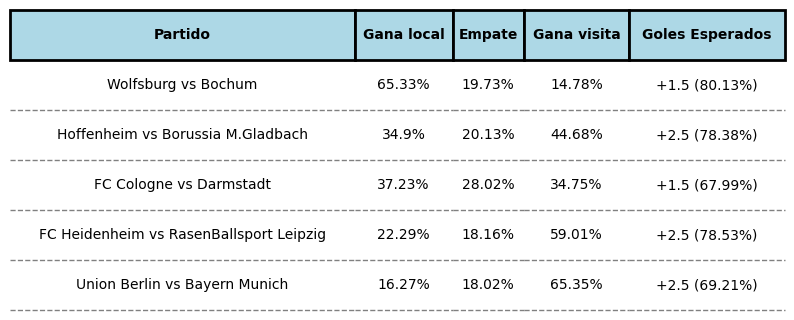

In [643]:
# Create a matplotlib table
fig, ax = plt.subplots(figsize=(1, len(filtered_df) * 0.5))
table = ax.table(cellText=filtered_df.values, colLabels=filtered_df.columns, loc='center')

ncols = len(filtered_df.columns)
nrows = len(filtered_df)

# Customize the table appearance
# table.set_fontsize(14)
table.scale(3, 3)
table.auto_set_column_width(col=list(range(len(df2))))  # Ajustar el ancho de la columna automáticamente

# Center the cell text and wrap the column width
for cell in table.get_celld().values():
    cell.set_text_props(horizontalalignment='center')

# Estilo de los nombres de las columnas (negrita)
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Si es la fila de los nombres de las columnas
        cell.set_text_props(fontweight='bold')  # Establecer negrita
        cell.set_facecolor('#add8e6')  # Color de fondo para la primera fila (azul claro)
        cell.set_linewidth(2)
    else:
        cell.set_edgecolor('grey')  # Establecer color de borde
        cell.set_linestyle('--')  # Establecer estilo de línea punteada
        cell.visible_edges = 'B'  # Mostrar solo los bordes superiores

ax.axis('off')

plt.show()